In [52]:
!pip install transformers
from transformers import pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
!pip install wordcloud
from wordcloud import WordCloud
import requests


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
data=[{"title": "Jan 01 2023",
    "body": "Happy New Year! It's hard to believe that it's already 2022. I woke up feeling a bit groggy from last night's festivities, but overall excited to start fresh in the new year. I spent most of the day lounging around, watching the Rose Parade and football games on TV. In the evening, I went out to dinner with some friends and we talked about our hopes and goals for the coming year. I'm looking forward to what this year has in store."},
{
"title": "Jan 02 2023",
"body": "Today was a bit of a mixed bag. I started the day feeling energized and motivated to tackle some new projects, but as the day went on I became more and more anxious. I'm not exactly sure what triggered it, but I just couldn't shake the feeling of unease. I tried some relaxation techniques like deep breathing and meditation, but they didn't seem to help much. I'm hoping tomorrow will be better."
},
{
"title": "Jan 03 2023",
"body": "Today was a great day! I woke up feeling refreshed and ready to take on the world. I tackled a bunch of tasks on my to-do list and even had time to catch up with a friend over lunch. In the evening, I went to a yoga class and left feeling rejuvenated. It's amazing how much of a difference a good day can make."
},
{
"title": "Jan 04 2023",
"body": "Today was a sad day. I found out that a close family member passed away unexpectedly. I'm heartbroken and struggling to process the news. It's times like these that make me realize how important it is to cherish the people we love and hold them close."
},
{
"title": "Jan 05 2023",
"body": "I'm still reeling from yesterday's news, but trying to stay positive. I spent some time today reflecting on the happy memories I have with my loved one and it brought me some comfort. It's hard to imagine life without them, but I know they'll always hold a special place in my heart."
},
{
"title": "Jan 06 2023",
"body": "Today was a surprising day. I got a call from an old friend who I haven't spoken to in years. We caught up and it was like no time had passed at all. It's amazing how some connections can withstand the test of time. I'm grateful for the unexpected surprise."
},
{
"title": "Jan 07 2023",
"body": "Today was a frustrating day. I had a disagreement with a coworker that left me feeling angry and upset. I tried to take some deep breaths and walk away from the situation, but I still feel unsettled. I'll have to find a way to address the issue tomorrow in a constructive way."
},
{
"title": "Jan 08 2023",
"body": "Today was a lovely day. I went for a hike in the mountains with some friends and the views were breathtaking. It's moments like these that remind me of the beauty of nature and the importance of spending time outdoors. I feel rejuvenated and grateful for the experience."
},
{
"title": "Jan 09 2023",
"body": "Today was a busy day. I had a lot of work to catch up on and it left me feeling a bit overwhelmed. I tried to prioritize my tasks and stay focused, but I still feel like I have a lot to do. I'm hoping to make some progress tomorrow and get back on track."
},
{
"title": "Jan 10 2023",
"body": "Today was a surprising day. I found out that I won a small scholarship that I applied for a while back. I wasn't expecting to receive it, so it was a pleasant surprise. It's always nice to feel recognized for your hard work."
},
{
"title": "Jan 11 2023",
"body": "Today was a nostalgic day. I stumbled upon some old photos of myself as a child and it brought back a flood of memories. It's interesting to see how much I've grown and changed over the years, but some things remain the same. Looking back on those moments made me feel grateful for the people and experiences that have shaped me into who I am today."
},
{
"title": "Jan 12 2023",
"body": "Today was a fearful day. I received some unsettling news about a family member's health and it's left me feeling scared and worried. I'm hoping for the best, but it's hard not to let my mind wander to the worst case scenario. I'll be holding my loved ones a little closer tonight."
},
{
"title": "Jan 13 2023",
"body": "Today was a happy day. I met up with some old friends for dinner and we had a great time catching up and reminiscing. It's amazing how even after years of not seeing each other, we can pick up right where we left off. I'm grateful for those friendships that stand the test of time."
},
{
"title": "Jan 14 2023",
"body": "Today was a frustrating day. I've been working on a project for weeks now and it feels like no matter what I do, I can't seem to make any progress. It's discouraging and I'm starting to feel like giving up. I'll need to take a break and regroup before tackling it again tomorrow."
},
{
"title": "Jan 15 2023",
"body": "Today was a surprising day. I received a package in the mail from a friend who lives across the country. It was completely unexpected and made me feel loved and appreciated. It's amazing how even small gestures can make a big impact."
},
{
"title": "Jan 16 2023",
"body": "Today was a peaceful day. I spent the day doing some much-needed self-care activities like taking a bubble bath, reading a good book, and taking a nap. It's important to take time for ourselves and recharge."
},
{
"title": "Jan 17 2023",
"body": "Today was a sad day. I received news that a friend's pet passed away. It's hard to see someone you care about go through loss and grief. I'll be reaching out to offer my support and condolences."
},
{
"title": "Jan 18 2023",
"body": "Today was an angry day. I had a frustrating encounter with a rude stranger that left me feeling angry and defensive. It's frustrating when someone takes their bad mood out on you, but I'll try not to let it ruin my day."
},
{
"title": "Jan 19 2023",
"body": "Today was a happy day. I took my dog to the park and it was so much fun watching him run and play with the other dogs. There's something so pure and joyful about watching animals have fun. It's a good reminder to find joy in the little things."
},
{
"title": "Jan 20 2023",
"body": "Today was a hopeful day. I attended a peaceful protest for a cause that's important to me. It's empowering to see people come together for a common goal and to fight for what they believe in. I'm hopeful that change is possible."
},
{
"title": "Jan 21 2023",
"body": "Today was a rollercoaster of emotions. I woke up feeling anxious about an upcoming job interview, but then received a call that my best friend is engaged! I'm so happy for her, but also feeling a bit sad that our dynamic will change once she gets married. Later in the day, I had the job interview and I think it went well, but now I'm just waiting to hear back. Overall, a mixed bag of emotions."
},
{
"title": "Jan 22 2023",
"body": "Today was a lazy day. I slept in and then spent most of the day binge-watching my favorite show on Netflix. It felt nice to just relax and not have any responsibilities for a day. I did feel a bit guilty about not being productive, but sometimes you just need a break."
},
{
"title": "Jan 23 2023",
"body": "I woke up feeling really motivated today. I started a new workout plan and went for a run in the park. It felt good to get my body moving and start the day off on the right foot. Later in the day, I met up with some friends for lunch and we had a great time catching up. Overall, a really positive day."
},
{
"title": "Jan 24 2023",
"body": "Today was a bit of a struggle. I had a lot of work to do and felt really overwhelmed by it all. I tried to take breaks throughout the day to avoid burnout, but it was still a tough day. I'm hoping tomorrow will be better."
},
{
"title": "Jan 25 2023",
"body": "Today was a total surprise. I received an email from a professor I haven't spoken to in years, offering me a research opportunity. I wasn't expecting it at all, but it felt like a sign that I'm on the right path. I'm excited to see where this opportunity takes me."
},
{
"title": "Jan 26 2023",
"body": "I had a really meaningful conversation with a friend today. We talked about some deep topics and it felt good to connect on a deeper level. Sometimes it's easy to get caught up in surface-level conversations, so this was a refreshing change."
},
{
"title": "Jan 27 2023",
"body": "Today was a sad day. I found out that a family member passed away unexpectedly. It's hard to process the news and I'm feeling a range of emotions. I'm trying to stay strong for my family, but it's tough."
},
{
"title": "Jan 28 2023",
"body": "Today was a day of reflection. I spent some time thinking about my goals for the year and what I want to accomplish. I also took some time to remember my family member who passed away and honor their memory. It's important to take time to reflect and appreciate the people in our lives."
},
{
"title": "Jan 29 2023",
"body": "Today was a frustrating day. I had plans to get some work done, but ended up dealing with a lot of unexpected roadblocks. It's frustrating when things don't go according to plan, but I'm trying to stay positive and remind myself that tomorrow is a new day."
},

{
"title": "Jan 30 2023",
"body": "Today was a really tough day. I found out that my best friend from college passed away unexpectedly. I'm in shock and devastated. We hadn't seen each other in a while but we talked on the phone regularly. I'm going to miss her so much. It's a reminder to hold our loved ones close and cherish every moment we have with them."
}]


In [54]:
date=[None]*30
entries=[None]*30
for i in range(len(data)):
  date[i]=data[i]["title"]
  entries[i]=data[i]["body"]

In [64]:
class Journals():

    def __init__(self,dates, entries):
      data={"dates":dates,"entries":entries}
      self.dates = dates
      self.entries=entries

    
    def daily_positive_negative_vals(self):
        sentiment_pipeline = pipeline("sentiment-analysis")
        sentiment_score_arr = [None]*(len(self.entries))
        for i in range(len(self.entries)):
            if(sentiment_pipeline(str(self.entries[i]))[0]["label"] == 'POSITIVE'):
                sentiment_score_arr[i] = sentiment_pipeline(
                str(self.entries[i]))[0]["score"]
            else:
                sentiment_score_arr[i] = -1* \
                   sentiment_pipeline(str(self.entries[i]))[0]["score"]
        return sentiment_score_arr

    def daily_positive_negative_graph(self):
        sentiment_pipeline = pipeline("sentiment-analysis")
        sentiment_score_arr = [None]*(len(self.entries))
        for i in range(len(self.entries)):
            if(sentiment_pipeline(str(self.entries[i]))[0]["label"] == 'POSITIVE'):
                sentiment_score_arr[i] = sentiment_pipeline(str(self.entries[i]))[0]["score"]
            else:
                sentiment_score_arr[i] = -1*sentiment_pipeline(str(self.entries[i]))[0]["score"]
        figure(figsize=(20, 9), dpi=80)
        clrs = ['red' if (x < 0) else 'green' for x in sentiment_score_arr]
        plt.bar(np.arange(1,31), sentiment_score_arr, color=clrs)
        plt.xlabel("date")
        plt.ylabel("Amount of Negative of Positive Emotion")
        plt.title("Rate of Positive Emotion Everyday")
        plt.savefig('single_class.png')
    def get_multiclass_graphs(self):
        classifier = pipeline(
           "text-classification", model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True)
        classifications = []
        for i in range(len(self.entries)):
            classifications.append(classifier(str(self.entries[i])))
        classifications = [
            item for sublist in classifications for item in sublist]
        scores_seperate = []
        for classification in classifications:
            scores = []
            for elem in classification:
                scores.append(elem['score'])
            scores_seperate.append(scores)
            plt.rcParams["figure.figsize"] = [7.50, 3.50]
            plt.rcParams["figure.autolayout"] = True
            bars = []
            labels = np.array(
                ["Sadness", "Joy", "Love", "Anger", "Fear", "Suprise"])
            colors = ["darkviolet", "lime", "hotpink", "red", "black", "darkorange"]
            for i in range(0, len(scores_seperate)):
                score_total = 0
                for j in range(0, len(scores_seperate[i])):
                    plt.barh(i, scores_seperate[i][j], left=score_total,label=labels[j], color = colors[j])
                    plt.title("Probability Distribution of Various Emotions")
                    score_total += scores_seperate[i][j]
                plt.legend()
                plt.savefig(str(i+1)+'.png')
                plt.close()
    def get_multiclass_scores(self):
        classifier = pipeline(
           "text-classification", model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True)
        classifications = []
        for i in range(len(self.entries)):
            classifications.append(classifier(str(self.entries[i])))
        classifications = [
            item for sublist in classifications for item in sublist]
        scores_seperate = []
        for classification in classifications:
            scores = []
            for elem in classification:
                scores.append(elem['score'])
            scores_seperate.append(scores)
        scores_seperate=np.array(scores_seperate)*10
        return np.round(scores_seperate)

    def create_wordCloud(self):
        w = WordCloud()
        stop_words = list(w.stopwords)
        custom_stop_words = ['Today', 'time','day','year']
        stop_words = set(stop_words + custom_stop_words)
        wordcloud = WordCloud(background_color="white", max_words=5000,
                              contour_width=3, contour_color='steelblue', stopwords=stop_words)
        wordcloud.generate(str(self.entries))
        return wordcloud.to_image().save("word_cloud.png")
    def create_summary(self):
        
        summarizer = pipeline("summarization",model="facebook/bart-large-cnn")
        return (summarizer(str(self.entries[0:15]),min_length=5,max_length=100,do_sample=False))
  


journal_array=Journals(date,entries)

In [56]:
journal_array.daily_positive_negative_vals()

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[0.9993797540664673,
 -0.9964678287506104,
 0.9994764924049377,
 0.9961881041526794,
 0.9997803568840027,
 0.9997265934944153,
 -0.9927389025688171,
 0.9998849630355835,
 0.9929661750793457,
 0.9998317956924438,
 0.9994632601737976,
 0.9881824851036072,
 0.9998693466186523,
 -0.9996258020401001,
 0.9998805522918701,
 0.9984132051467896,
 -0.6093926429748535,
 -0.9523440003395081,
 0.9998776912689209,
 0.999829888343811,
 -0.6697168946266174,
 -0.9196310043334961,
 0.9998530149459839,
 -0.9902549386024475,
 0.9996764659881592,
 0.9998420476913452,
 -0.9711459279060364,
 0.9993995428085327,
 0.9974198341369629,
 0.9891651272773743]

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


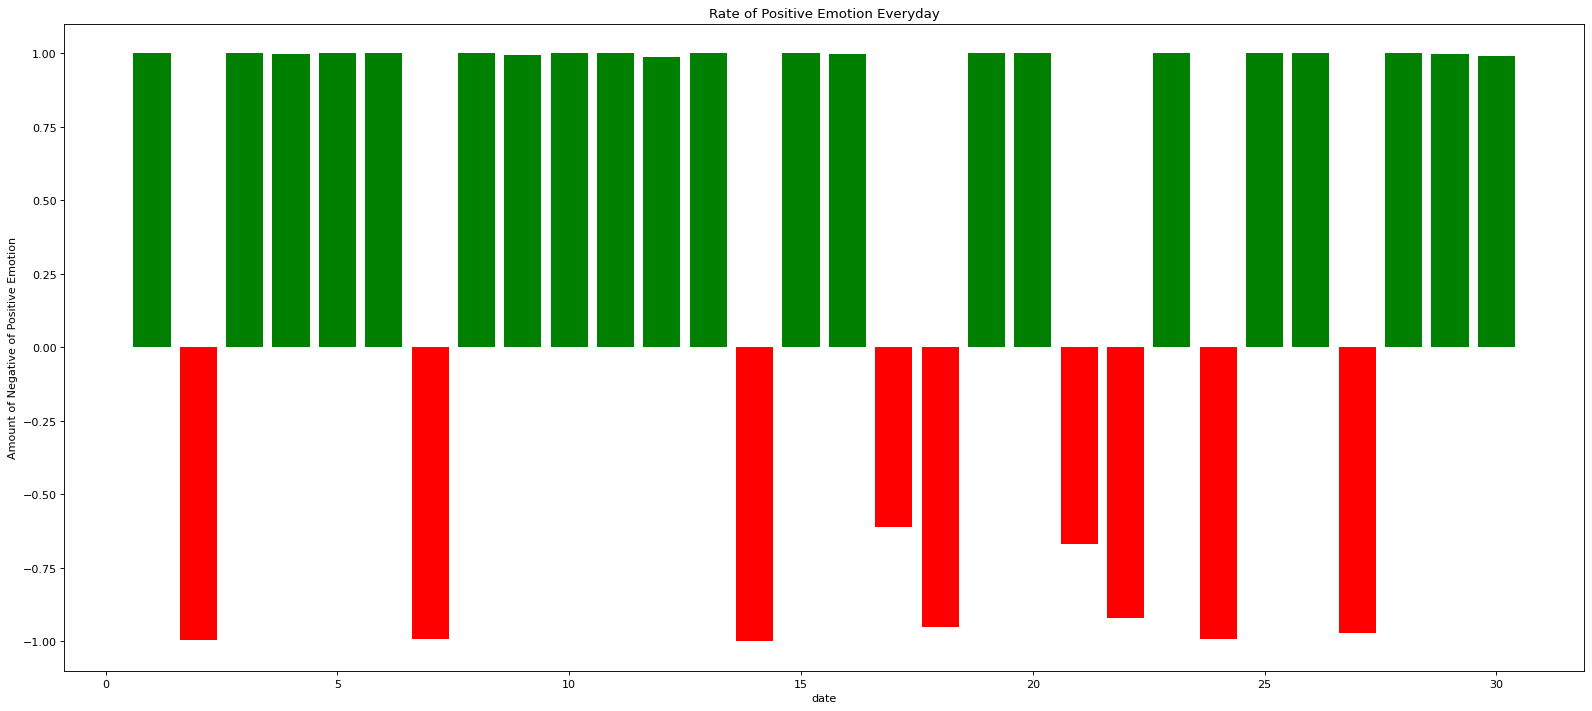

In [57]:
journal_array.daily_positive_negative_graph()

In [58]:
journal_array.get_multiclass_scores()

array([[10.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  7.,  0.,  0.,  3.,  0.],
       [ 0., 10.,  0.,  0.,  0.,  0.],
       [10.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  9.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0., 10.,  0.,  0.],
       [ 0., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  3.,  7.],
       [ 0., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  3.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 10.,  0.],
       [ 0., 10.,  0.,  0.,  0.,  0.],
       [ 8.,  2.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  0.,  0.,  0.],
       [ 0., 10.,  0.,  0.,  0.,  0.],
       [ 8.,  1.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 10.,  0.,  0.],
       [ 0., 10.,  0.,  0.,  0.,  0.],
       [ 0., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 10.,  0.],
       [ 0., 10.,  0.,  0.,  0.,  0.],
       [ 0., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  3.,  7.],
       [ 0., 10.,  0.,  0.,  0.,  0.],
       [ 0., 10.,  0.,  0

In [59]:
journal_array.get_multiclass_graphs()

In [66]:
journal_array.create_wordCloud()

In [61]:
journal_array.create_summary()

[{'summary_text': '"Today was a bit of a mixed bag. I started the day feeling energized and motivated to tackle some new projects, but as the day went on I became more and more anxious. I\'m hoping tomorrow will be better." "I found out that I won a small scholarship that I applied for a while back. It\'s always nice to feel recognized for your hard work"'}]